In [1]:
import os
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
from torch.utils.data import DataLoader, sampler
from torchvision import transforms as T
from torchvision import models

from PIL import Image

from matplotlib import pyplot as plt
%matplotlib inline

from datetime import datetime

from usns_v3_utils import *
from usns_v3_models import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
DATA_PATH = 'data/'
MODEL_PATH = 'models/'
SUBMS_PATH = 'submissions/'


if torch.cuda.is_available():
    device = torch.device('cuda')
    dtype = torch.cuda.FloatTensor
else:
    device = torch.device('cpu')
    dtype = torch.FloatTensor

In [5]:
params = {
    'batch_size': 2,
    'num_train': 2000,
    'num_train_full': 5000
}

In [6]:
trainset = USNSDataset(os.path.join(DATA_PATH, 'labeled'), train=True, transform=transform, mask_transform=transform_mask)

loader_train = DataLoader(trainset, batch_size=params['batch_size'],
                          sampler=sampler.SubsetRandomSampler(range(params['num_train'])),
                          num_workers=4, pin_memory=True)
loader_val = DataLoader(trainset, batch_size=params['batch_size'],
                        sampler=sampler.SubsetRandomSampler(range(params['num_train'], trainset.__len__())),
                        num_workers=4, pin_memory=True)

trainset_full = USNSDataset(os.path.join(DATA_PATH, 'train'), train=True,
                            transform=transform, mask_transform=transform_mask)
loader_train_full = DataLoader(trainset_full, batch_size=params['batch_size'],
                               sampler=sampler.SubsetRandomSampler(range(params['num_train_full'])),
                               num_workers=4, pin_memory=True)
loader_val_full = DataLoader(trainset_full, batch_size=params['batch_size'],
                             sampler=sampler.SubsetRandomSampler(range(params['num_train_full'], len(trainset_full))),
                             num_workers=4, pin_memory=True)

In [7]:
n_filters = 64

unet = Unet(n_filters=n_filters, bn=True)
unet = unet.to(device=device);

detector = USNSDetector(unet, device)

1000 images processed, loss = 0.5900589110851288
Validation loss = 0.5874042703410772
Val Dice score = 0.11714491993188858

2000 images processed, loss = 0.459484938621521
Validation loss = 0.36754080277728285
Val Dice score = 0.3580550253391266

3000 images processed, loss = 0.29955419921875
Validation loss = 0.24471178833893903
Val Dice score = 0.39687156677246094

4000 images processed, loss = 0.1852833675146103
Validation loss = 0.1456543244245484
Val Dice score = 0.6677311658859253

5000 images processed, loss = 0.12196260032057762
Validation loss = 0.0990729952539046
Val Dice score = 0.5770745873451233

After 1 epochs: loss = 0.0
Validation loss = 0.09907299569976612
Val Dice score = 0.5770745873451233


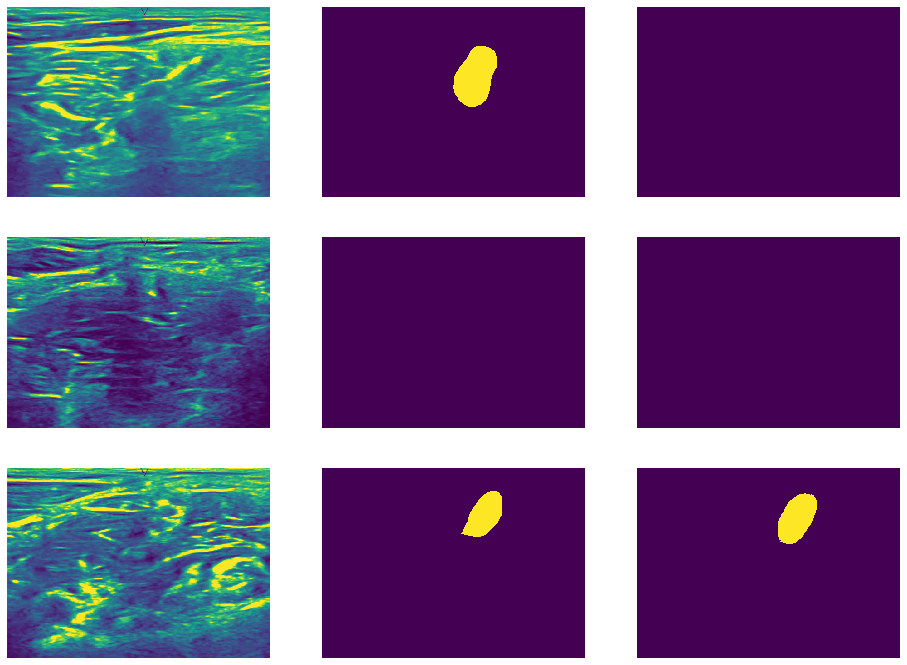


6000 images processed, loss = 0.08846680581569671
Validation loss = 0.07545579698846096
Val Dice score = 0.6506587862968445

7000 images processed, loss = 0.07102667075395584
Validation loss = 0.058370669274114245
Val Dice score = 0.6940268874168396

8000 images processed, loss = 0.06085242247581482
Validation loss = 0.052645167943060865
Val Dice score = 0.7188803553581238

9000 images processed, loss = 0.05431942209601402
Validation loss = 0.04752298507282114
Val Dice score = 0.7104448676109314

10000 images processed, loss = 0.05094790366292
Validation loss = 0.04683072167470699
Val Dice score = 0.704454243183136

After 2 epochs: loss = 0.0
Validation loss = 0.046830721756839375
Val Dice score = 0.7044540047645569


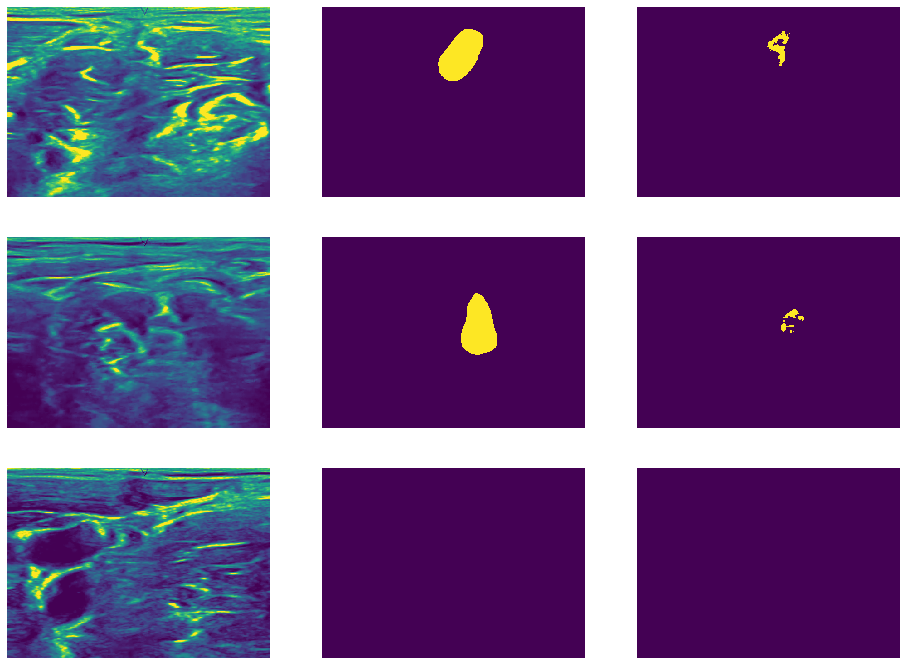


11000 images processed, loss = 0.04566778726875782
Validation loss = 0.04561735360230517
Val Dice score = 0.6941806077957153

12000 images processed, loss = 0.04496248437464237
Validation loss = 0.04040146546335671
Val Dice score = 0.6963914036750793

13000 images processed, loss = 0.04262271104007959
Validation loss = 0.039354964477692066
Val Dice score = 0.7066046595573425

14000 images processed, loss = 0.04330596785247326
Validation loss = 0.04022441879501493
Val Dice score = 0.6968669295310974

15000 images processed, loss = 0.04015691006928682
Validation loss = 0.0387829877670825
Val Dice score = 0.6573466062545776

After 3 epochs: loss = 0.0
Validation loss = 0.0387829877788157
Val Dice score = 0.6573467254638672


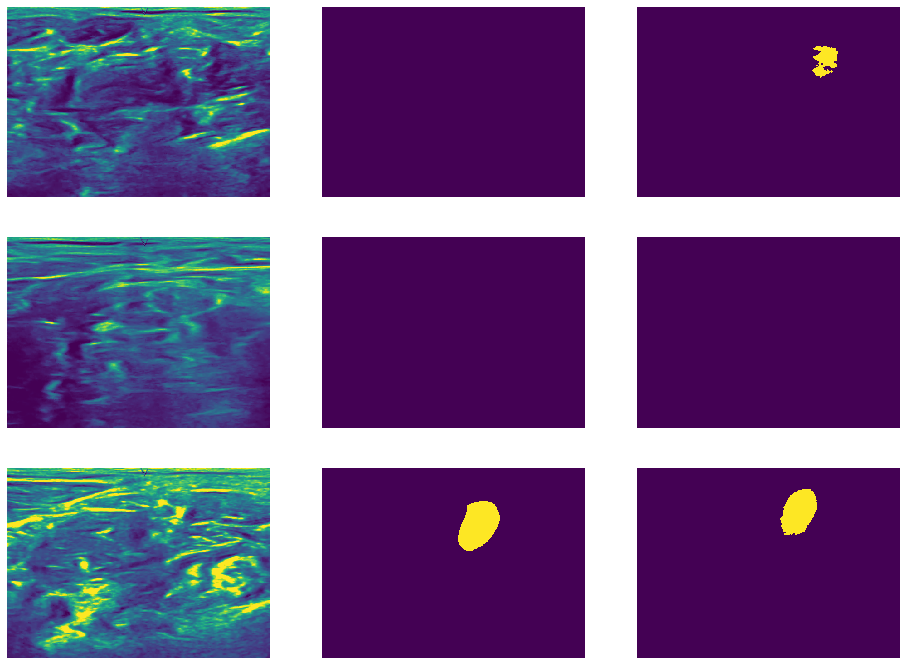


16000 images processed, loss = 0.03997001867741346
Validation loss = 0.03978324190486134
Val Dice score = 0.6977475881576538

17000 images processed, loss = 0.039314194194972514
Validation loss = 0.03945890768893122
Val Dice score = 0.6464589238166809

18000 images processed, loss = 0.03865348670631647
Validation loss = 0.037754758837537504
Val Dice score = 0.6025922298431396

19000 images processed, loss = 0.036544147484004495
Validation loss = 0.03674673862227305
Val Dice score = 0.6872522830963135

20000 images processed, loss = 0.03765348916500807
Validation loss = 0.03739605517837945
Val Dice score = 0.7002231478691101

After 4 epochs: loss = 0.0
Validation loss = 0.03739605500238148
Val Dice score = 0.7002232074737549


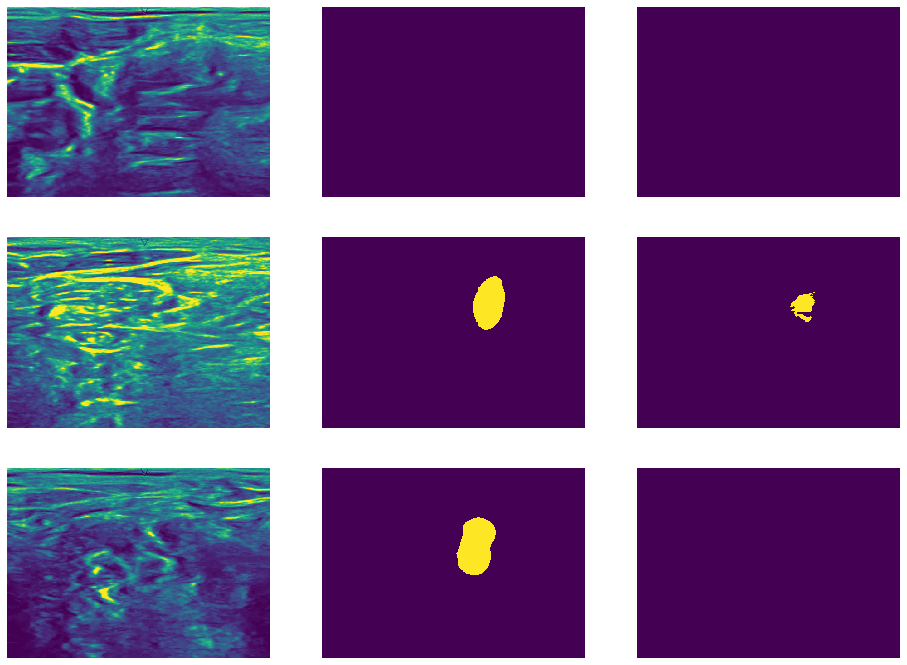


21000 images processed, loss = 0.03630119448155165
Validation loss = 0.038396993258924
Val Dice score = 0.6956731081008911

22000 images processed, loss = 0.037092962063848975
Validation loss = 0.039014505691767676
Val Dice score = 0.7134153246879578

23000 images processed, loss = 0.03548462034389377
Validation loss = 0.03709152212117131
Val Dice score = 0.6993524432182312

24000 images processed, loss = 0.03751318646222353
Validation loss = 0.036862512672041346
Val Dice score = 0.6264079213142395

25000 images processed, loss = 0.0353065443187952
Validation loss = 0.037078531670171444
Val Dice score = 0.671180248260498

After 5 epochs: loss = 0.0
Validation loss = 0.037078531630571905
Val Dice score = 0.6711801290512085


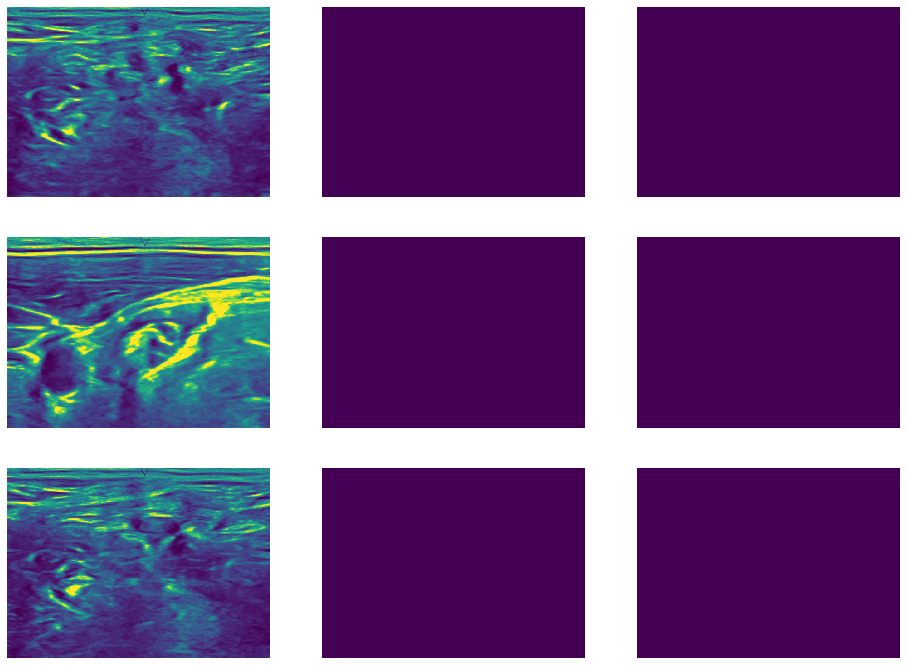


26000 images processed, loss = 0.03479430305957794
Validation loss = 0.0366443214923378
Val Dice score = 0.7075847387313843

27000 images processed, loss = 0.03694265802949667
Validation loss = 0.03619811317230773
Val Dice score = 0.6974570751190186

28000 images processed, loss = 0.03472684866189957
Validation loss = 0.038578693941235545
Val Dice score = 0.7133116722106934

29000 images processed, loss = 0.035253739062696694
Validation loss = 0.03674524409007134
Val Dice score = 0.7078080177307129

30000 images processed, loss = 0.03322981200367212
Validation loss = 0.035137105255028396
Val Dice score = 0.7060262560844421

After 6 epochs: loss = 0.0
Validation loss = 0.035137105257961695
Val Dice score = 0.7060263752937317


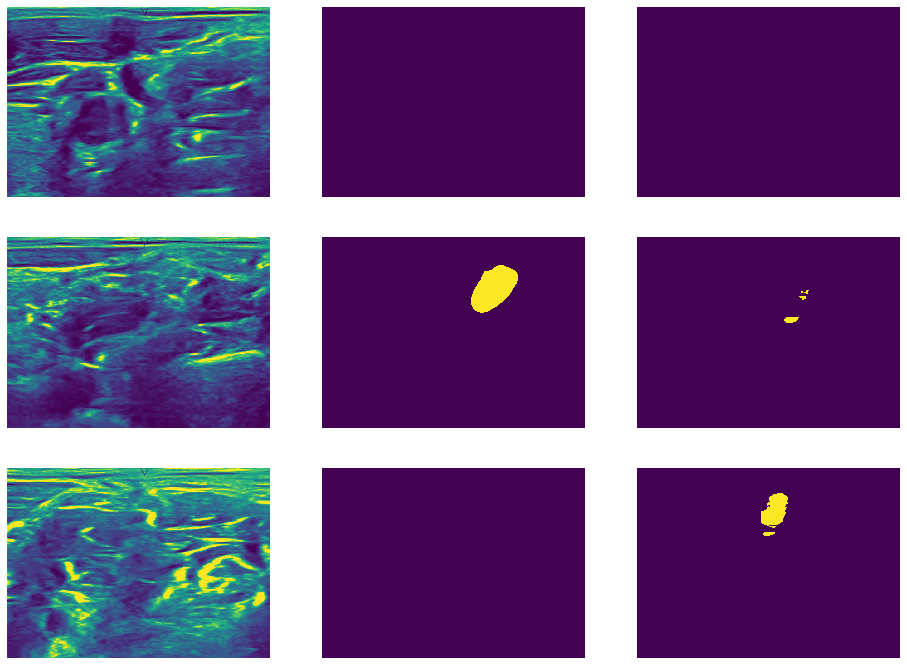


31000 images processed, loss = 0.03329976297542453
Validation loss = 0.03555377117526813
Val Dice score = 0.7125632762908936

32000 images processed, loss = 0.03424755032733083
Validation loss = 0.03763484383427252
Val Dice score = 0.6667590737342834

33000 images processed, loss = 0.03360619597509503
Validation loss = 0.03612281099020496
Val Dice score = 0.6945716142654419

34000 images processed, loss = 0.03365158293023705
Validation loss = 0.03580874907454168
Val Dice score = 0.6388952732086182

35000 images processed, loss = 0.033833179645240304
Validation loss = 0.038570389544635306
Val Dice score = 0.6840399503707886

After 7 epochs: loss = 0.0
Validation loss = 0.03857038945663632
Val Dice score = 0.6840401291847229


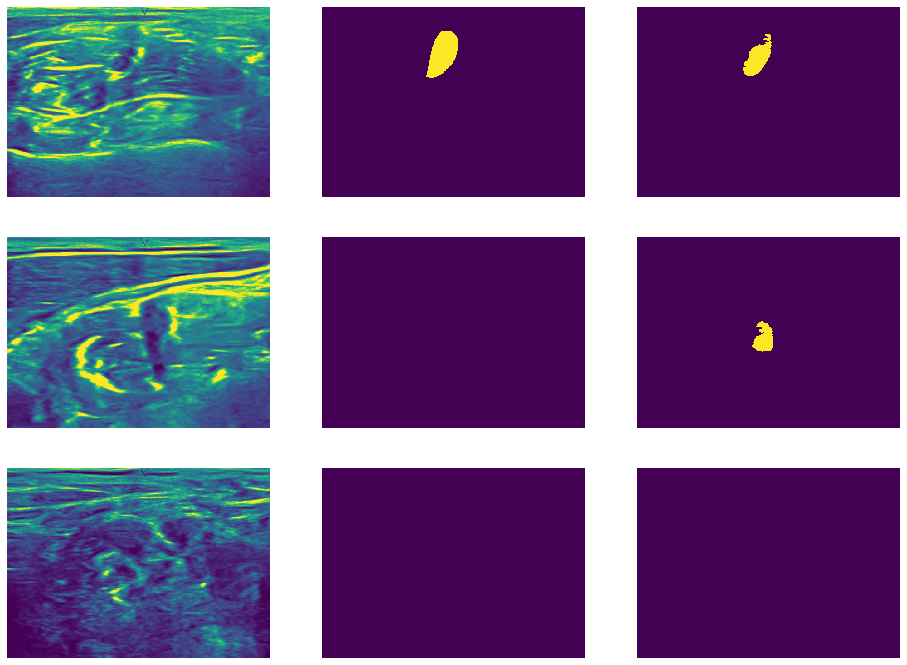


36000 images processed, loss = 0.032284186031669375
Validation loss = 0.03686225501688446
Val Dice score = 0.6895144581794739

37000 images processed, loss = 0.03236552080139518
Validation loss = 0.03660754530037951
Val Dice score = 0.6726295351982117

38000 images processed, loss = 0.03378736076503992
Validation loss = 0.03691528607013188
Val Dice score = 0.6919413805007935

39000 images processed, loss = 0.03186043157428503
Validation loss = 0.036259230754272204
Val Dice score = 0.6867761015892029

40000 images processed, loss = 0.030849377915263175
Validation loss = 0.038291646915627274
Val Dice score = 0.7187400460243225

After 8 epochs: loss = 0.0
Validation loss = 0.03829164722069042
Val Dice score = 0.7187401652336121


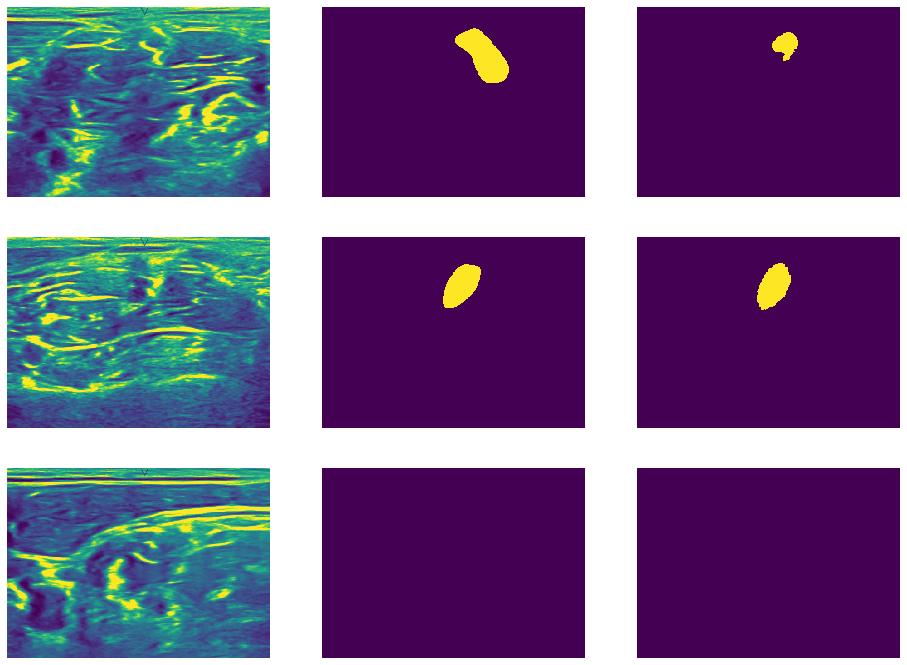


41000 images processed, loss = 0.029964530237019064
Validation loss = 0.03651430708040872
Val Dice score = 0.7074588537216187

42000 images processed, loss = 0.031041512619704007
Validation loss = 0.037374548936688054
Val Dice score = 0.636213481426239

43000 images processed, loss = 0.03103380535542965
Validation loss = 0.03812761911609042
Val Dice score = 0.6356001496315002

44000 images processed, loss = 0.03203414107114077
Validation loss = 0.036197887407982444
Val Dice score = 0.7136035561561584

45000 images processed, loss = 0.03168051402643323
Validation loss = 0.03839190513130248
Val Dice score = 0.6651694178581238

After 9 epochs: loss = 0.0
Validation loss = 0.03839190517236867
Val Dice score = 0.6651692986488342


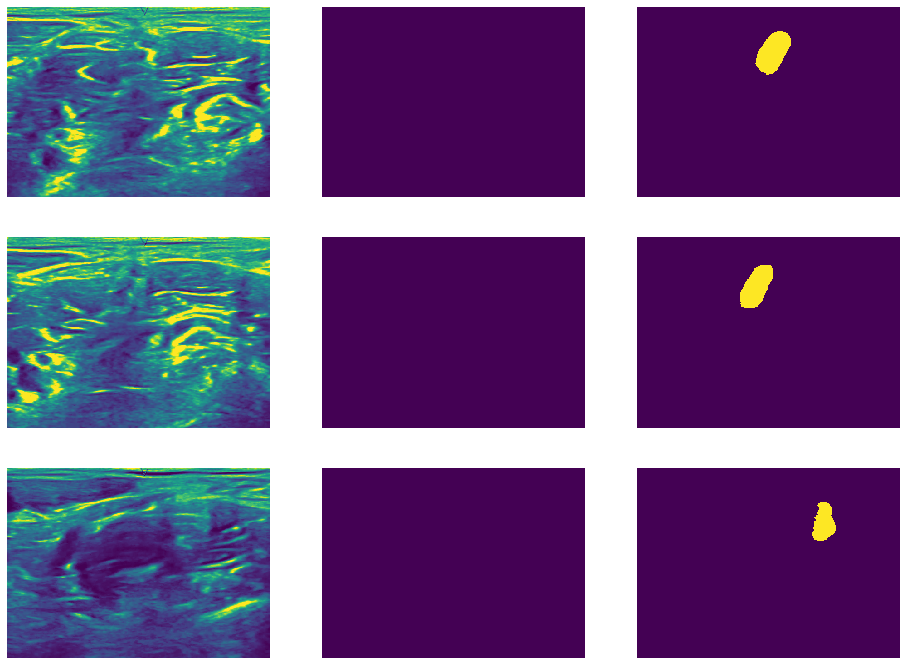


46000 images processed, loss = 0.02946836817637086
Validation loss = 0.03918771229860351
Val Dice score = 0.6853683590888977

47000 images processed, loss = 0.02942550003901124
Validation loss = 0.03813958694263706
Val Dice score = 0.658774733543396

48000 images processed, loss = 0.028799683529883623
Validation loss = 0.04070497782622266
Val Dice score = 0.6943424940109253

49000 images processed, loss = 0.029824563231319188
Validation loss = 0.038192038419913116
Val Dice score = 0.6413089632987976

50000 images processed, loss = 0.03279594958946109
Validation loss = 0.03801945156938448
Val Dice score = 0.713696300983429

After 10 epochs: loss = 0.0
Validation loss = 0.0380194514520525
Val Dice score = 0.7136961221694946


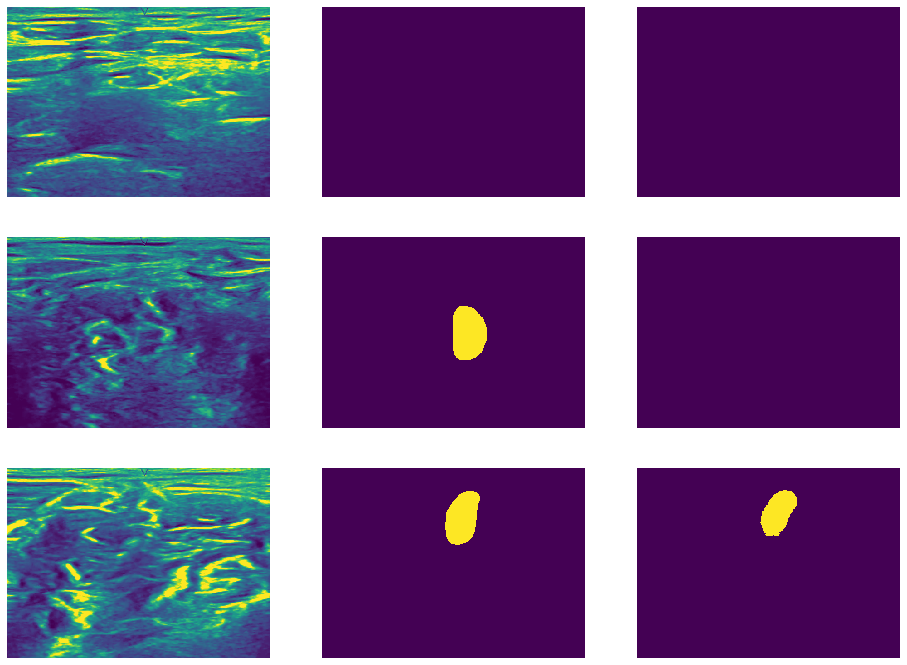


51000 images processed, loss = 0.02807183051109314
Validation loss = 0.04010793382199261
Val Dice score = 0.6795182228088379

52000 images processed, loss = 0.028021841689944267
Validation loss = 0.039201818116185234
Val Dice score = 0.6951478719711304

53000 images processed, loss = 0.028361244924366473
Validation loss = 0.0410129120148073
Val Dice score = 0.7109679579734802

54000 images processed, loss = 0.028601121291518213
Validation loss = 0.03848872922771559
Val Dice score = 0.7134812474250793

55000 images processed, loss = 0.028555990017950533
Validation loss = 0.04222810393947316
Val Dice score = 0.5718945264816284

After 11 epochs: loss = 0.0
Validation loss = 0.042228103544944384
Val Dice score = 0.5718945264816284


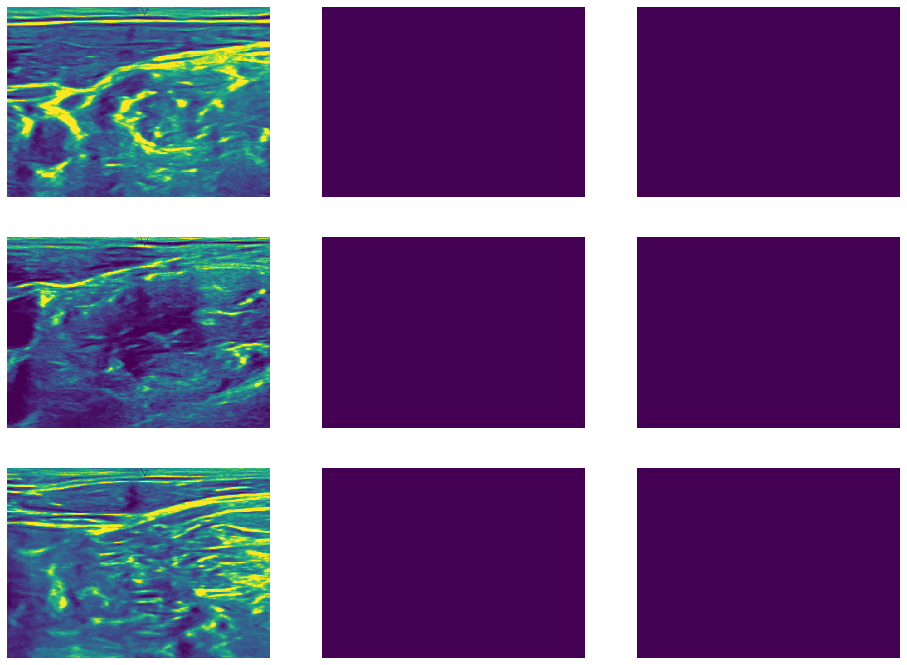


56000 images processed, loss = 0.02610082871839404
Validation loss = 0.0448812219042947
Val Dice score = 0.6858201622962952

57000 images processed, loss = 0.027067355643957854
Validation loss = 0.04047427917353985
Val Dice score = 0.7013130187988281

58000 images processed, loss = 0.027702651638537645
Validation loss = 0.038283843887368524
Val Dice score = 0.6575532555580139

59000 images processed, loss = 0.02822279182076454
Validation loss = 0.04006221302909645
Val Dice score = 0.708990216255188

60000 images processed, loss = 0.02877403948828578
Validation loss = 0.04041641282988345
Val Dice score = 0.695912778377533

After 12 epochs: loss = 0.0
Validation loss = 0.04041641274775107
Val Dice score = 0.695912778377533


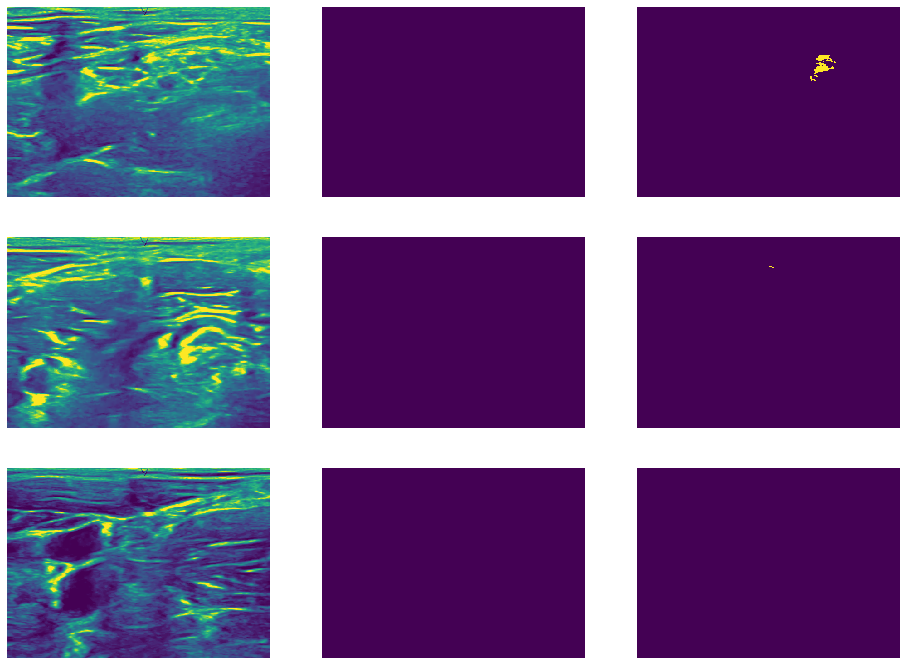


61000 images processed, loss = 0.025176243174821138
Validation loss = 0.041959556743619945
Val Dice score = 0.6842869520187378

62000 images processed, loss = 0.02647645015642047
Validation loss = 0.0418241772654019
Val Dice score = 0.657829225063324

63000 images processed, loss = 0.02642828243225813
Validation loss = 0.039578245826593535
Val Dice score = 0.7057252526283264

64000 images processed, loss = 0.026744035221636295
Validation loss = 0.04055857826170959
Val Dice score = 0.6448055505752563

65000 images processed, loss = 0.027421643510460853
Validation loss = 0.04068914990960144
Val Dice score = 0.6054219603538513

After 13 epochs: loss = 0.0
Validation loss = 0.04068914998000062
Val Dice score = 0.6054219007492065


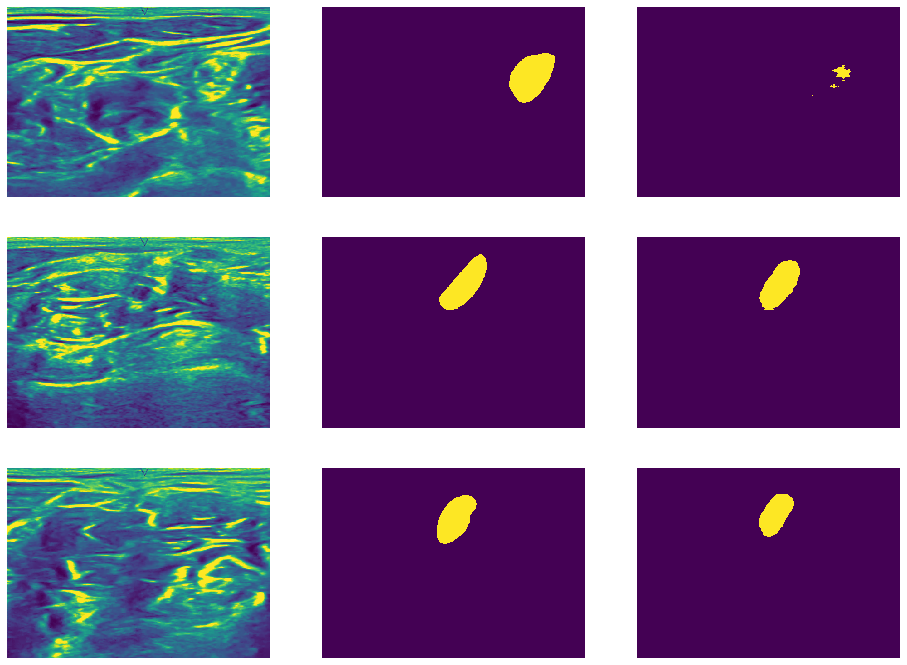


66000 images processed, loss = 0.025030150666832923
Validation loss = 0.04379746842337406
Val Dice score = 0.6653413772583008

67000 images processed, loss = 0.024234073150902986
Validation loss = 0.04299797263788426
Val Dice score = 0.6361218690872192

68000 images processed, loss = 0.026031867064535617
Validation loss = 0.04064795684626722
Val Dice score = 0.7019205093383789

69000 images processed, loss = 0.026490981984883546
Validation loss = 0.042368333276331896
Val Dice score = 0.6606773734092712

70000 images processed, loss = 0.02687869432196021
Validation loss = 0.11034898296233238
Val Dice score = 0.6430074572563171

After 14 epochs: loss = 0.0
Validation loss = 0.11034898215274172
Val Dice score = 0.6430073976516724


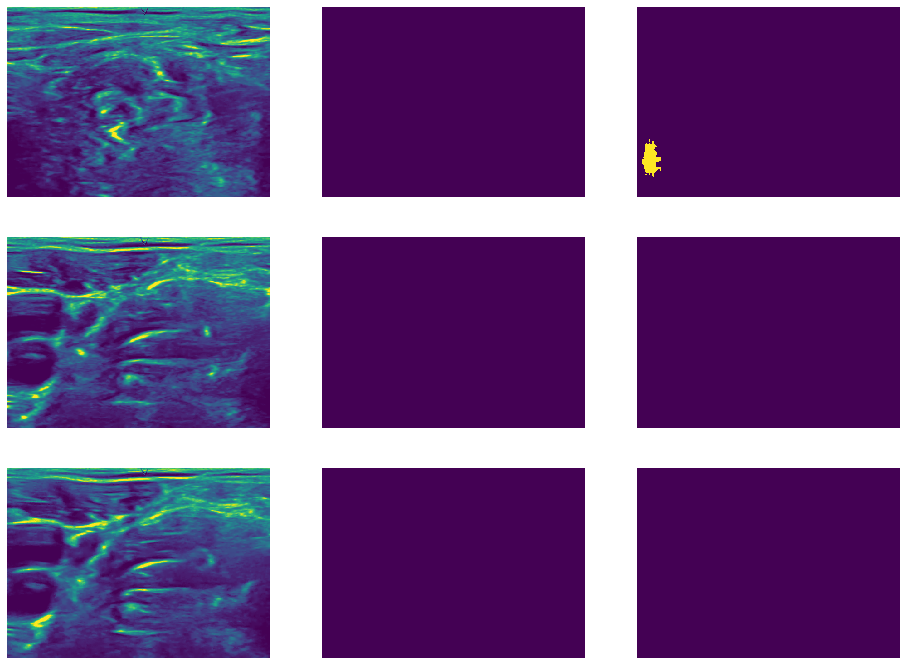


71000 images processed, loss = 0.025565634023398162
Validation loss = 0.04386856794562631
Val Dice score = 0.6792534589767456

72000 images processed, loss = 0.02412593610212207
Validation loss = 0.042162488763198606
Val Dice score = 0.6832494735717773

73000 images processed, loss = 0.024894325245171784
Validation loss = 0.044242286740794896
Val Dice score = 0.683845579624176

74000 images processed, loss = 0.02424954893067479
Validation loss = 0.041719756260748926
Val Dice score = 0.691123366355896

75000 images processed, loss = 0.025014811899513007
Validation loss = 0.04420307591322839
Val Dice score = 0.6976452469825745

After 15 epochs: loss = 0.0
Validation loss = 0.04420307607162656
Val Dice score = 0.6976452469825745


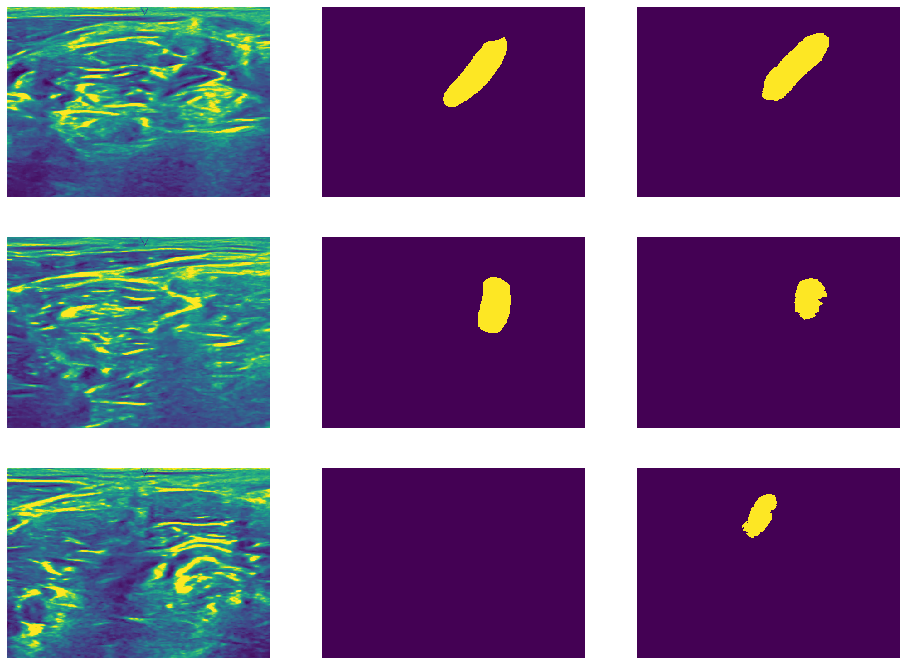


76000 images processed, loss = 0.022945443641394378
Validation loss = 0.047150009055071926
Val Dice score = 0.6599482297897339

77000 images processed, loss = 0.024248694136738778
Validation loss = 0.041539361674015916
Val Dice score = 0.6882798671722412

78000 images processed, loss = 0.023571491830050945
Validation loss = 0.03871656912342301
Val Dice score = 0.625333309173584

79000 images processed, loss = 0.02580651691555977
Validation loss = 0.04439574772213388
Val Dice score = 0.6787042617797852

80000 images processed, loss = 0.024548045787960292
Validation loss = 0.04681842862445069
Val Dice score = 0.7166064977645874

After 16 epochs: loss = 0.0
Validation loss = 0.04681842892658054
Val Dice score = 0.7166066765785217


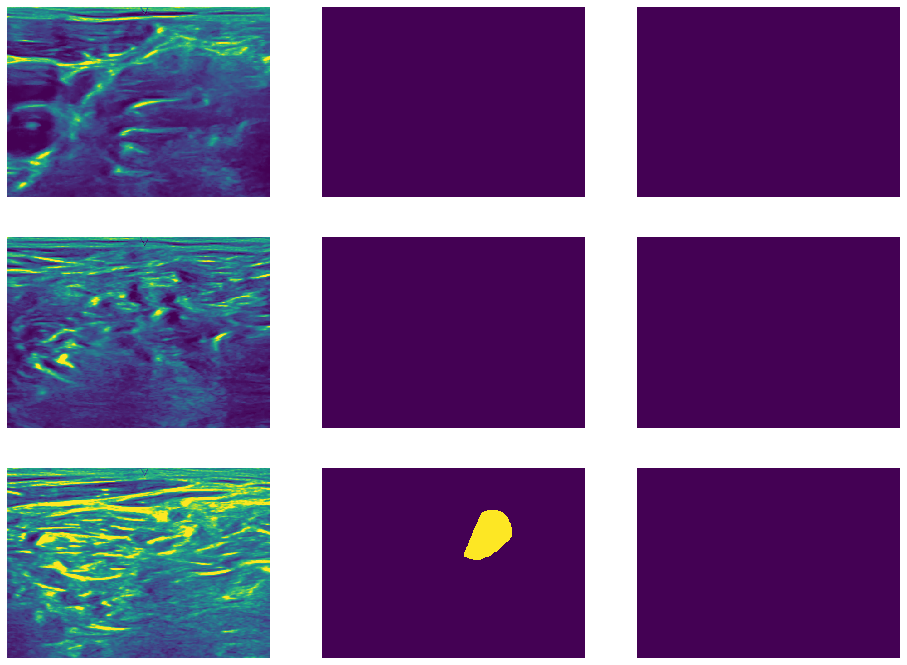


81000 images processed, loss = 0.0232068285793066
Validation loss = 0.044733623872826415
Val Dice score = 0.6575493812561035

82000 images processed, loss = 0.02300989706069231
Validation loss = 0.048316191337768016
Val Dice score = 0.692494809627533

83000 images processed, loss = 0.02417777641862631
Validation loss = 0.044036937458074
Val Dice score = 0.6993477940559387

84000 images processed, loss = 0.02481088849902153
Validation loss = 0.048764015610997136
Val Dice score = 0.6847333312034607

85000 images processed, loss = 0.023475510224699975
Validation loss = 0.049801648023912286
Val Dice score = 0.7220713496208191

After 17 epochs: loss = 0.0
Validation loss = 0.049801648554839484
Val Dice score = 0.7220713496208191


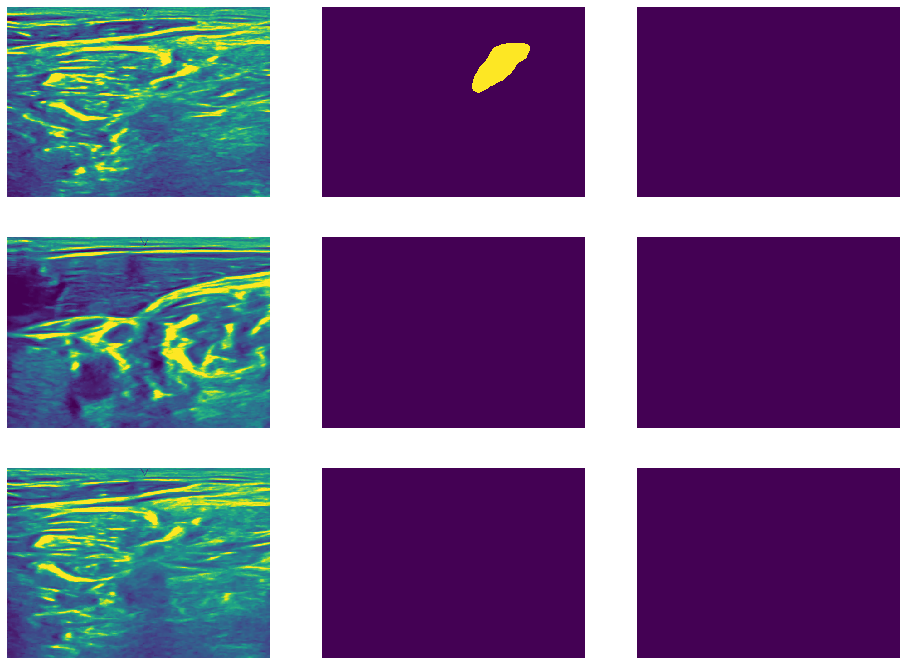


86000 images processed, loss = 0.022878436826169492
Validation loss = 0.046899865379953005
Val Dice score = 0.6916952133178711

87000 images processed, loss = 0.022756312426179648
Validation loss = 0.04534354737893803
Val Dice score = 0.6916241645812988

88000 images processed, loss = 0.02291568898409605
Validation loss = 0.04743874720114422
Val Dice score = 0.6967151165008545

89000 images processed, loss = 0.022687871240079403
Validation loss = 0.046694522832087644
Val Dice score = 0.6793675422668457

90000 images processed, loss = 0.024854723546653985
Validation loss = 0.04281103907842336
Val Dice score = 0.6929327249526978

After 18 epochs: loss = 0.0
Validation loss = 0.04281103887309239
Val Dice score = 0.6929329037666321


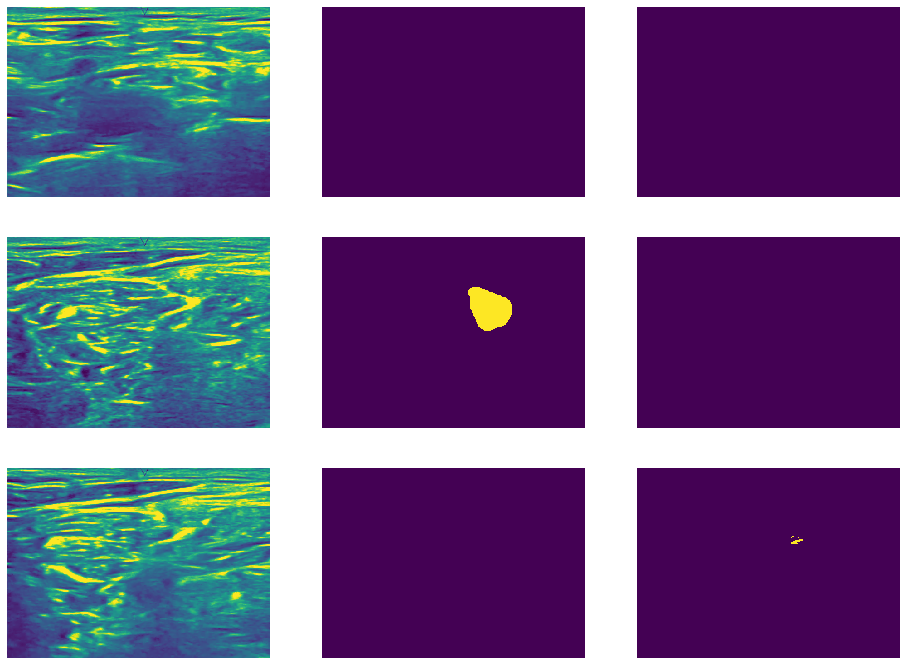


91000 images processed, loss = 0.021892451912164688
Validation loss = 0.04483931259963456
Val Dice score = 0.6634160280227661

92000 images processed, loss = 0.022551297530531884
Validation loss = 0.052248896960550406
Val Dice score = 0.7116854190826416

93000 images processed, loss = 0.022110512685030698
Validation loss = 0.047983427408818655
Val Dice score = 0.6902652978897095

94000 images processed, loss = 0.023496745750308037
Validation loss = 0.0456815369955198
Val Dice score = 0.7012081742286682

95000 images processed, loss = 0.023477490182965993
Validation loss = 0.04165465176750825
Val Dice score = 0.6947823166847229

After 19 epochs: loss = 0.0
Validation loss = 0.0416546520403051
Val Dice score = 0.6947822570800781


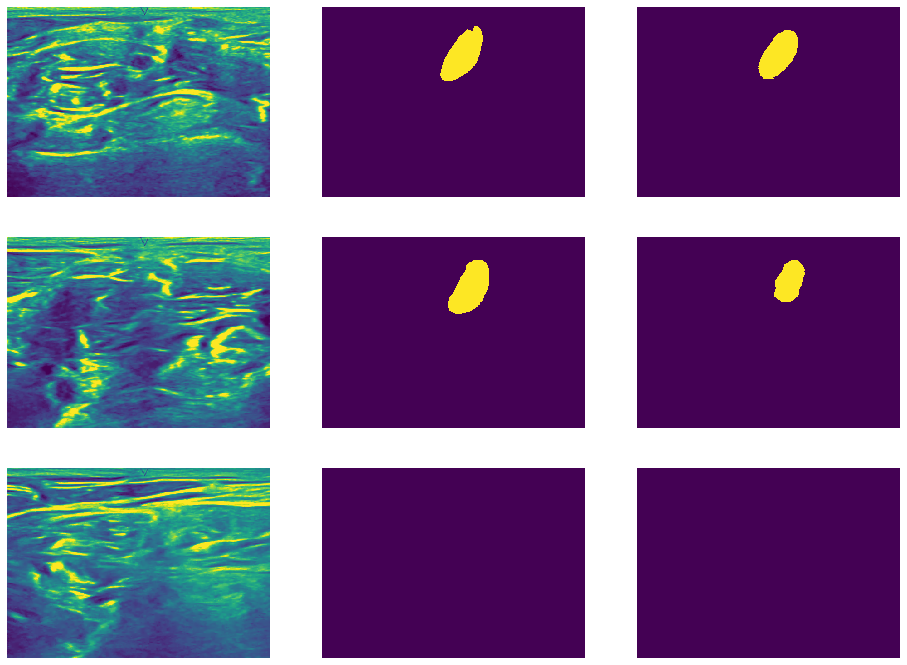


96000 images processed, loss = 0.0214043946377933
Validation loss = 0.049685103188114844
Val Dice score = 0.6992695927619934

97000 images processed, loss = 0.022624426376074553
Validation loss = 0.04542448022586154
Val Dice score = 0.6563853025436401

98000 images processed, loss = 0.02356904284283519
Validation loss = 0.04760059640104846
Val Dice score = 0.5729512572288513

99000 images processed, loss = 0.023079630799591543
Validation loss = 0.04761873483951167
Val Dice score = 0.6809143424034119

100000 images processed, loss = 0.022606707107275723
Validation loss = 0.04816075194128386
Val Dice score = 0.6933309435844421

After 20 epochs: loss = 0.0
Validation loss = 0.04816075141915656
Val Dice score = 0.6933311820030212


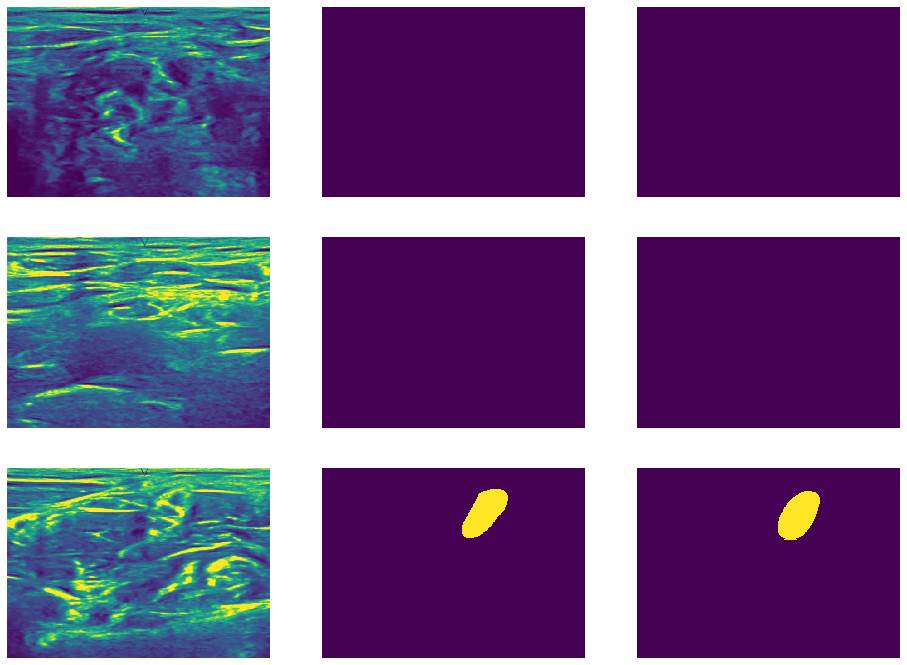


CPU times: user 4h 11min 19s, sys: 12min 47s, total: 4h 24min 7s
Wall time: 4h 20min 21s


In [7]:
%%time

params_train = {
    'epochs': 20,
    'print_every': 1000,
    'lr': 0.0001
}

detector.fit(loader_train_full, loader_val_full, **params_train)

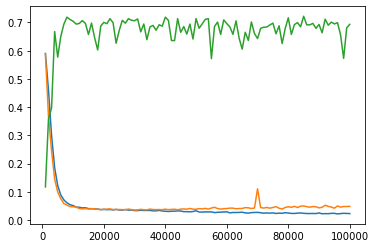

In [8]:
plt.plot(detector.n_samples, detector.loss_history,
         detector.n_samples, detector.val_loss_history,
         detector.n_samples, detector.dice_history)

In [9]:
torch.save(detector.model.state_dict(),
           os.path.join(MODEL_PATH, 'unet_v3_filters64_epochs20.pth'))

In [10]:
torch.save(detector.best_model_wts,
           os.path.join(MODEL_PATH, 'unet_v3_best_filters64_epochs20.pth'))

In [8]:
detector.model.load_state_dict(torch.load(os.path.join(MODEL_PATH, 'unet_v3_filters64_epochs20.pth')))

<All keys matched successfully>

## Binary classsifier

In [9]:
out_left = None
out_last = None

def leftout_hook(m, i, o):
    global out_left
    out_left = o

def lastout_hook(m, i, o):
    global out_last
    out_last = o

In [10]:
detector.model.dn_blk4.register_forward_hook(leftout_hook)
detector.model.up_blk4.register_forward_hook(lastout_hook)

In [27]:
x, y = iter(loader_val_full).next()
x = x.to(device)
y = y.to(device)

In [28]:
detector.model.eval()
with torch.no_grad():
    out_model = detector.model(x)

In [29]:
print(out_left.shape)
print(out_last.shape)

torch.Size([2, 512, 52, 72])
torch.Size([2, 64, 416, 576])


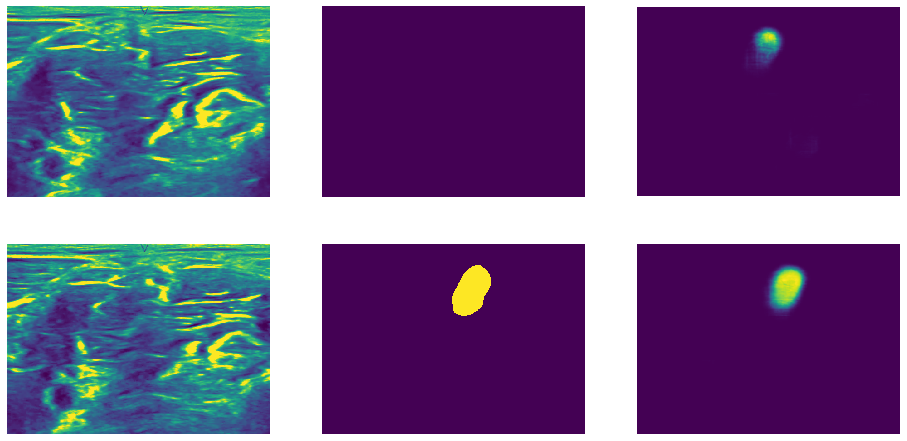

In [31]:
show_imgs(x.cpu(),
          y.cpu(),
          (out_model.detach().cpu()[:, 1, :, :] - out_model.detach().cpu()[:, 0, :, :]).sigmoid().unsqueeze(1))

## Submission

In [12]:
testset = USNSDataset(os.path.join(DATA_PATH, 'test'), train=False, transform=transform, mask_transform=transform_mask)
loader_test = DataLoader(testset, batch_size=4)

In [14]:
%%time
fname = datetime.now().strftime('%Y%m%d_%H%M%S') + '.csv'
subms_path = os.path.join(SUBMS_PATH, fname)
detector.generate_submission(loader_test, subms_path)

CPU times: user 4min 7s, sys: 1.2 s, total: 4min 8s
Wall time: 3min 50s


## Draft

In [17]:
torch.cuda.empty_cache()

In [39]:
x, y = iter(loader_val_full).next()

In [40]:
pred = detector(x.to(device))

In [43]:
detector.dice(pred, y.squeeze().to(device))

tensor([0.0000, 1.0000, 0.0000, 0.0000, 0.2836, 1.0000, 0.6809, 1.0000, 0.0000,
        0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7884],
       device='cuda:0')